**Gradient Descent for multile Variables**  

This is my attempt of implementing Gradient Descent for multiple Variables

In [91]:
import numpy as np 
import matplotlib.pyplot as plt
from copy import deepcopy

In [92]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [93]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

**`f_wb` and loss function**

We will try to implement our loss function 2 ways: with for-loop and vectorization. That's why in our `f_wb`, we will add some `if` statements to account for our use cases.

In [94]:
def f_wb(w, b, x):
    if x.ndim == 0:
        return w * x + b
    elif x.ndim == 1:
        return np.sum(w * x) + b
    elif x.ndim == 2:
        return np.sum(w * x, axis = 1) + b

Loss function with for-loop

In [95]:
def MSE(w = None, b = None, x_set = None, y_set = None, function = f_wb):
    f = function
    m = len(x_set)
    loss = np.zeros(m)
    for i in range(m):
        loss[i] = loss[i] + (f(w, b, x_set[i]) - y_set[i])**2

    loss = np.sum(loss) / (2 * m)

    return loss

In [96]:
MSE(w_init, b_init, X_train, y_train, f_wb)

1.5578904428966628e-12

Loss function with vectorization

In [97]:
def MSE_Vectorized(w = None, b = None, x_set = None, y_set = None, function = f_wb):
    f = function
    loss = (f(w, b, x_set) - y_set)**2
    loss = np.sum(loss) / (2 * len(x_set))
    return loss

In [98]:
MSE_Vectorized(w_init, b_init, X_train, y_train, f_wb)

1.5578904428966628e-12

**Gradient**

Like with the loss function, I'll also implement Gradient with for-loop and with vectorization

In [99]:
def Gradient(w = None, b = None, function = f_wb, x_set = None, y_set = None):
    f = function
    (m, n) = x_set.shape
    df_dw = np.zeros(n)
    df_db = 0

    for i in range(m):
        err = f(w, b, x_set[i]) - y_set[i]
        df_dw += err * x_set[i]
        
        df_db += err
    
    df_dw = df_dw / m
    df_db = df_db / m

    return df_dw, df_db


In [100]:
Gradient(w_init, b_init, f_wb, X_train, y_train)

(array([-2.72623577e-03, -6.27197263e-06, -2.21745578e-06, -6.92403391e-05]),
 -1.6739251501955248e-06)

In [101]:
def Gradient_Vectorized(w = None, b = None, function = f_wb, x_set = None, y_set = None):
    f = function
    (m, n) = x_set.shape

    err = (f(w, b, x_set) - y_set).reshape(3, 1)
    df_dw = np.sum(err * x_set, axis = 0) / m
    df_db = np.sum(err, axis=0) / m

    return df_dw, df_db

In [102]:
Gradient_Vectorized(w_init, b_init, f_wb, X_train, y_train)

(array([-2.72623577e-03, -6.27197263e-06, -2.21745578e-06, -6.92403391e-05]),
 array([-1.67392515e-06]))

**Gradient Descent**

In [103]:
def GradentDescent(w_in = None, b_in = None, function = f_wb, learning_rate = 0.001, iterations = 1000, x_set = None, y_set = None):
    w = deepcopy(w_in)
    b = b_in
    f = function
    a = learning_rate
    x = x_set
    y = y_set
    loss_hist = []
    params = []

    for i in range(iterations):
        df_dw, df_db = Gradient_Vectorized(w, b, f, x, y)
        w = w - a * df_dw
        b = b - a * df_db
        loss_hist.append(MSE_Vectorized(w, b, x, y, f))
        params.append([w, b])

    return w, b, loss_hist, params


**Testing our Gradient Descent**

In [104]:
iteration = 1000
a = 0.0001
initial_w = np.zeros(X_train.shape[-1])
initial_b = 0.
w_trained, b_trained, loss, params = GradentDescent(initial_w, initial_b, f_wb, a, iteration, X_train, y_train)
print(loss)

[2759533106.4784656, 155978608402094.1, 8.816466940902886e+18, 4.983381382657287e+23, 2.8167847927609926e+28, 1.592147170662422e+33, 8.999383337921362e+37, 5.08677225040451e+42, 2.8752249966342593e+47, 1.6251796570237788e+52, 9.186094725441408e+56, 5.192308182057674e+61, 2.9348776670891113e+66, 1.6588974727160658e+71, 9.37667983862917e+75, 5.300033681539243e+80, 2.995767959328887e+85, 1.6933148363568777e+90, 9.571219046179594e+94, 5.409994176100391e+99, 3.057921550455232e+104, 1.7284462615593418e+109, 9.769794384207506e+113, 5.522236035477437e+118, 3.121364650295987e+123, 1.7643065630524147e+128, 9.972489590841786e+132, 5.6368065914457064e+137, 3.18612401245773e+142, 1.8009108629281813e+147, 1.0179390141537231e+152, 5.753754157779079e+156, 3.2522269456076294e+161, 1.8382745970187568e+166, 1.0390583285119141e+171, 5.873128050623643e+175, 3.3197013249893566e+180, 1.8764135214054926e+185, 1.0606158080575671e+190, 5.99497860929405e+194, 3.3885756041779206e+199, 1.9153437190632268e+204, 1.0

/var/folders/c1/frv2q9z92mn9r_np8s6v84cm0000gn/T/ipykernel_44329/4181520151.py:3: RuntimeWarning: overflow encountered in square
  loss = (f(w, b, x_set) - y_set)**2
/var/folders/c1/frv2q9z92mn9r_np8s6v84cm0000gn/T/ipykernel_44329/3263301342.py:6: RuntimeWarning: overflow encountered in multiply
  df_dw = np.sum(err * x_set, axis = 0) / m
/var/folders/c1/frv2q9z92mn9r_np8s6v84cm0000gn/T/ipykernel_44329/3907371599.py:13: RuntimeWarning: invalid value encountered in subtract
  w = w - a * df_dw


Here we can see that our loss is increasing, despite my checking the code for bugs. So I came to the conclusion that maybe our learning rate is still too big. Let's reduce the Learning rate.

In [105]:
iteration = 1000
a = 0.0000005
initial_w = np.zeros(X_train.shape[-1])
initial_b = 0.
w_trained, b_trained, loss, params = GradentDescent(initial_w, initial_b, f_wb, a, iteration, X_train, y_train)
print(loss)

[2529.4629522316304, 765.8336829952988, 699.6290280210446, 697.1337425623095, 697.0296591788104, 697.0153256006653, 697.0043615139087, 696.9935248096691, 696.9826938019223, 696.9718639233548, 696.9610350024587, 696.9502070327148, 696.939380013799, 696.9285539456151, 696.9177288280792, 696.9069046611058, 696.8960814446137, 696.8852591785139, 696.8744378627272, 696.8636174971624, 696.852798081742, 696.8419796163756, 696.8311621009815, 696.8203455354765, 696.8095299197731, 696.7987152537909, 696.7879015374392, 696.7770887706384, 696.7662769533032, 696.7554660853489, 696.7446561666906, 696.7338471972458, 696.7230391769273, 696.7122321056518, 696.7014259833372, 696.6906208098934, 696.6798165852423, 696.6690133092947, 696.6582109819711, 696.6474096031822, 696.6366091728472, 696.6258096908772, 696.615011157195, 696.6042135717122, 696.5934169343424, 696.5826212450056, 696.5718265036138, 696.5610327100843, 696.5502398643335, 696.5394479662783, 696.5286570158306, 696.517867012907, 696.5070779574

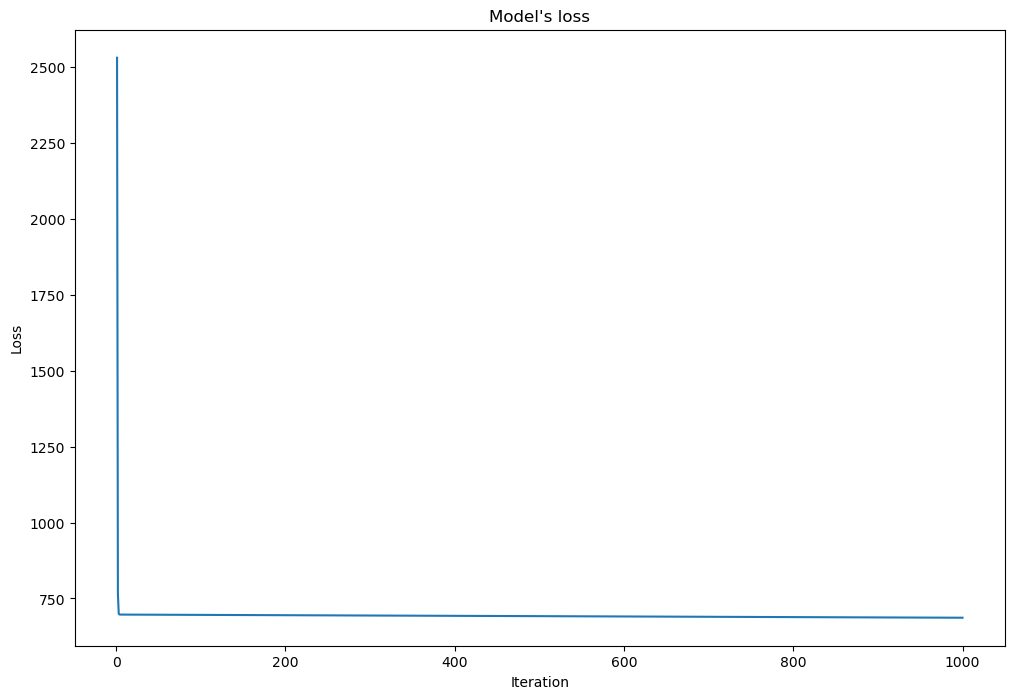

In [106]:
i = range(1, iteration + 1)
plt.figure(figsize=(12, 8))
plt.plot(i, loss)
plt.title("Model's loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.show();

We obtain our trained w and b

In [107]:
print([w_trained, b_trained])

[array([ 0.20396569,  0.00374919, -0.0112487 , -0.0658614 ]), array([-0.00223541])]
